## Load libraries

In [11]:
import os
import logging

import pandas as pd
import numpy as np
import h5py
from sklearn.metrics import classification_report

from alphai_watson.performance import GANPerformanceAnalysis
from alphai_watson.transformer import NullTransformer
from alphai_rickandmorty_oracle.datasource.mnist import MNISTDataSource
from alphai_rickandmorty_oracle.detective import RickAndMortyDetective
from alphai_rickandmorty_oracle.model import RickAndMorty
from alphai_rickandmorty_oracle.architecture.mnist import MNISTGanArchitecture

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg

logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

%matplotlib inline


## Define MNIST Datasource

In [2]:
file_path = '../../tests/resources'

abnormal_digit = 0

# Train and test data file
train_data_file = os.path.join(file_path, 'mnist_data_train_abnormalclass-{}.hd5'.format(abnormal_digit))
test_data_file = os.path.join(file_path, 'mnist_data_test_abnormalclass-{}.hd5'.format(abnormal_digit))

# Model parameters
n_sensors = 28
n_timesteps = 784 // n_sensors

train_data_source = MNISTDataSource(source_file=train_data_file, 
                                    transformer=NullTransformer(number_of_timesteps=n_timesteps,
                                                                number_of_sensors=n_sensors))
test_data_source = MNISTDataSource(source_file=test_data_file,
                                   transformer=NullTransformer(number_of_timesteps=n_timesteps,
                                                               number_of_sensors=n_sensors))

train_data = train_data_source.get_train_data('NORMAL')

### Plot input images to verify correctness

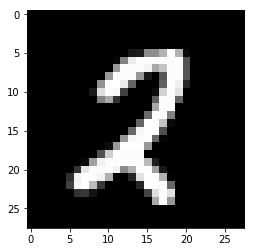

In [7]:
# First row is first image
image = train_data.data[np.random.randint(0, len(train_data.data))]

# Plot the image
plt.imshow(np.reshape(image, (28, 28)), cmap='gray')
plt.show()

## Define Model & Train

In [8]:
model_dir = './mnist_models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

batch_size = 64
output_dimensions = 784
plot_dimensions = (28, 28)
train_iters = 10000
plot_save_path = model_dir

architecture = MNISTGanArchitecture(output_dimensions, plot_dimensions)

model = RickAndMorty(architecture=architecture,
                     batch_size=batch_size,
                     train_iters=train_iters,
                     plot_save_path=plot_save_path)

detective = RickAndMortyDetective(
    model_configuration = {
        'model': model,
        'output_dimensions': output_dimensions,
        'batch_size': batch_size,
        'train_iters': train_iters,
        'save_path' : '{}/MNIST-abnormalclass-{}'.format(model_dir, abnormal_digit),
        'plot_save_path' : plot_save_path
    }
)

iter 0	train disc cost	1.405949354171753	time	1.273423194885254
iter 1	train disc cost	1.3597774505615234	time	0.13468360900878906	train gen cost	0.729017972946167
iter 2	train disc cost	1.3189308643341064	time	0.06230020523071289	train gen cost	0.685967743396759
iter 3	train disc cost	1.293200969696045	time	0.06390953063964844	train gen cost	0.6604728102684021
iter 4	train disc cost	1.263659954071045	time	0.0659034252166748	train gen cost	0.6439668536186218
iter 99	train disc cost	0.32273128628730774	time	0.06325852243523848	train gen cost	2.704766273498535
iter 199	train disc cost	0.0019899937324225903	time	0.05546499252319336	train gen cost	7.601080417633057
iter 299	train disc cost	5.987512486171909e-05	time	0.059660980701446535	train gen cost	10.852395057678223
iter 399	train disc cost	8.683506166562438e-06	time	0.061906962394714354	train gen cost	12.617691993713379
iter 499	train disc cost	4.005118626082549e-06	time	0.055833699703216555	train gen cost	13.355813980102539
iter 599	

iter 7499	train disc cost	0.18533365428447723	time	0.06164418458938599	train gen cost	4.1863837242126465
iter 7599	train disc cost	0.16473764181137085	time	0.05548101902008057	train gen cost	4.1143693923950195
iter 7699	train disc cost	0.1753740906715393	time	0.060206315517425536	train gen cost	4.0177507400512695
iter 7799	train disc cost	0.1660291850566864	time	0.05811527490615845	train gen cost	4.159371852874756
iter 7899	train disc cost	0.15342266857624054	time	0.055229287147521976	train gen cost	4.371084213256836
iter 7999	train disc cost	0.15899434685707092	time	0.059525482654571533	train gen cost	4.185436248779297
iter 8099	train disc cost	0.15899193286895752	time	0.056927461624145505	train gen cost	4.348563194274902
iter 8199	train disc cost	0.155077263712883	time	0.05629349708557129	train gen cost	4.375942230224609
iter 8299	train disc cost	0.15635107457637787	time	0.059751136302947996	train gen cost	4.433170318603516
iter 8399	train disc cost	0.1497199386358261	time	0.05561512

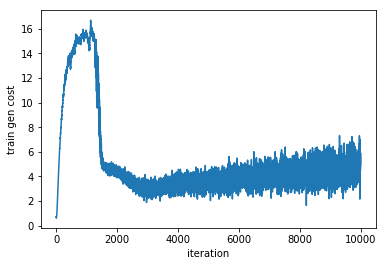

In [9]:
detective.train(train_data)

### Plot cost curves

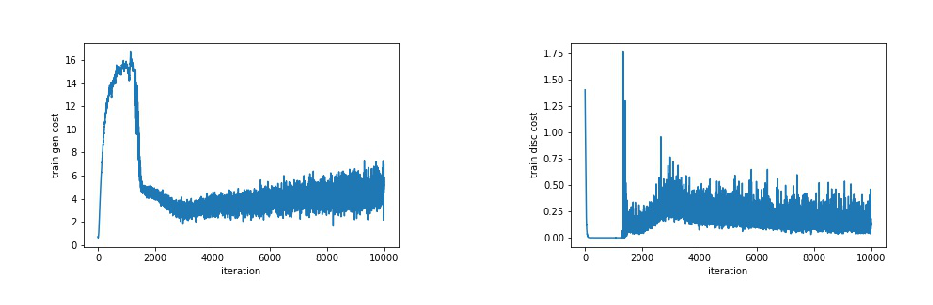

In [12]:
gen_cost_img = mpimg.imread(os.path.join(plot_save_path, 'train_gen_cost.jpg'))
disc_cost_img = mpimg.imread(os.path.join(plot_save_path, 'train_disc_cost.jpg'))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.imshow(gen_cost_img);
ax1.axis('off');
ax2.imshow(disc_cost_img);
ax2.axis('off');

## Evaluate Results

### Load trained model

In [ ]:
# detective = RickAndMortyDetective(model_configuration={
#     'model': model,
#     'output_dimensions': output_dimensions,
#     'batch_size': batch_size,
#     'train_iters': train_iters,
#     'load_path' : '{}/MNIST-abnormalclass-{}'.format(model_dir, abnormal_digit),
#     'plot_save_path' : plot_save_path
# })

### Visualise generated samples

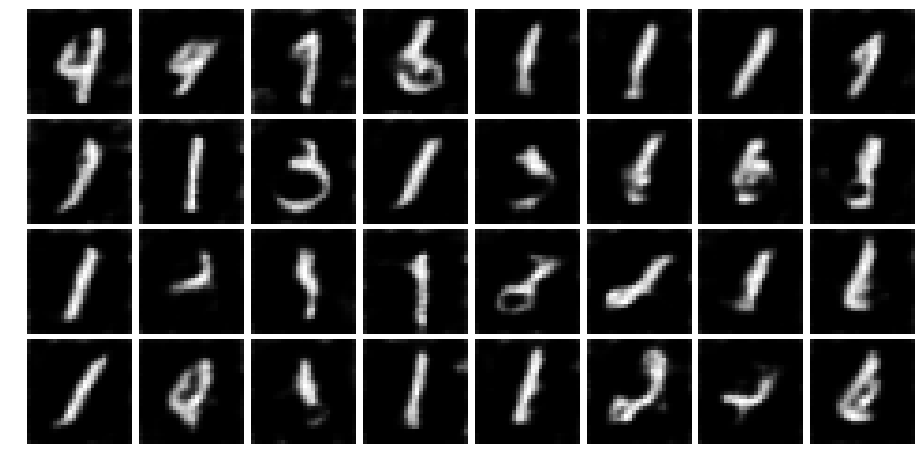

In [6]:
n_row = 4
n_col = 8

plt.figure(figsize=(2*n_col, 2*n_row))

gs = gridspec.GridSpec(n_row, n_col)
gs.update(wspace=0.025, hspace=0.05)

generated_samples = detective.model.generate_fake_samples()

for i in range(n_row * n_col):
    ax = plt.subplot(gs[i])
    ax.axis('off')
    ax.imshow(generated_samples[i], cmap='gray')

### Load test data

In [7]:
# Get test data
test_data_normal = test_data_source.get_train_data('NORMAL')
test_data_abnormal = test_data_source.get_train_data('ABNORMAL')
test_data = test_data_source.get_train_data('ALL')

# Ground truth for NORMAL data is 1, ground truth for ABNORMAL data is 0
n1 = np.ones(len(test_data_normal.data))
n2 = np.zeros(len(test_data_abnormal.data))
expected_truth = np.hstack((n1, n2))

# Run detection on test data
test_results_normal = detective.detect(test_data_normal).data
test_results_abnormal = detective.detect(test_data_abnormal).data

detection_result = np.hstack((test_results_normal, test_results_abnormal))

### Calculate ROC Score

In [8]:
roc_score = GANPerformanceAnalysis({}).analyse(
  detection_result=detection_result.data,
  expected_truth=expected_truth
)

print('ROC Score: {}'.format(roc_score))

ROC Score: 0.6657509034520236


### Generate classification report

In [9]:
train_results = detective.detect(train_data).data
threshold = np.mean(train_results)
prediction = [1 if x >= threshold else 0 for x in detection_result.data]

target_names = ['ABNORMAL', 'NORMAL']
print(classification_report(expected_truth, prediction, target_names=target_names))

              precision    recall  f1-score   support

    ABNORMAL       0.48      0.60      0.53      6903
      NORMAL       0.75      0.64      0.69     12620

   micro avg       0.63      0.63      0.63     19523
   macro avg       0.61      0.62      0.61     19523
weighted avg       0.65      0.63      0.63     19523



## Root Cause Analysis

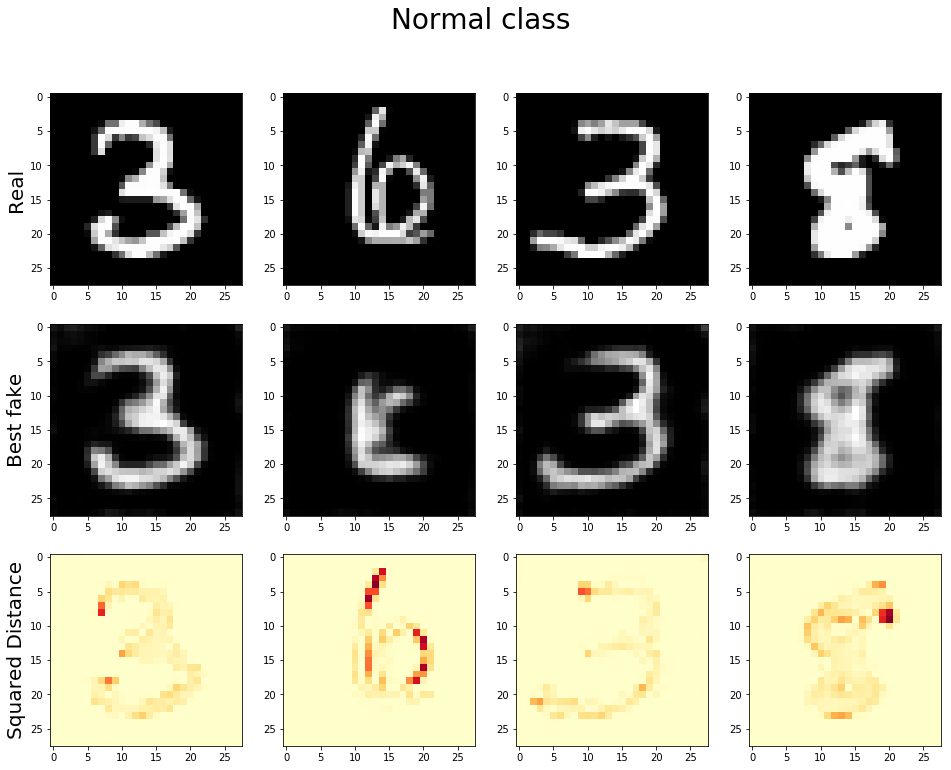

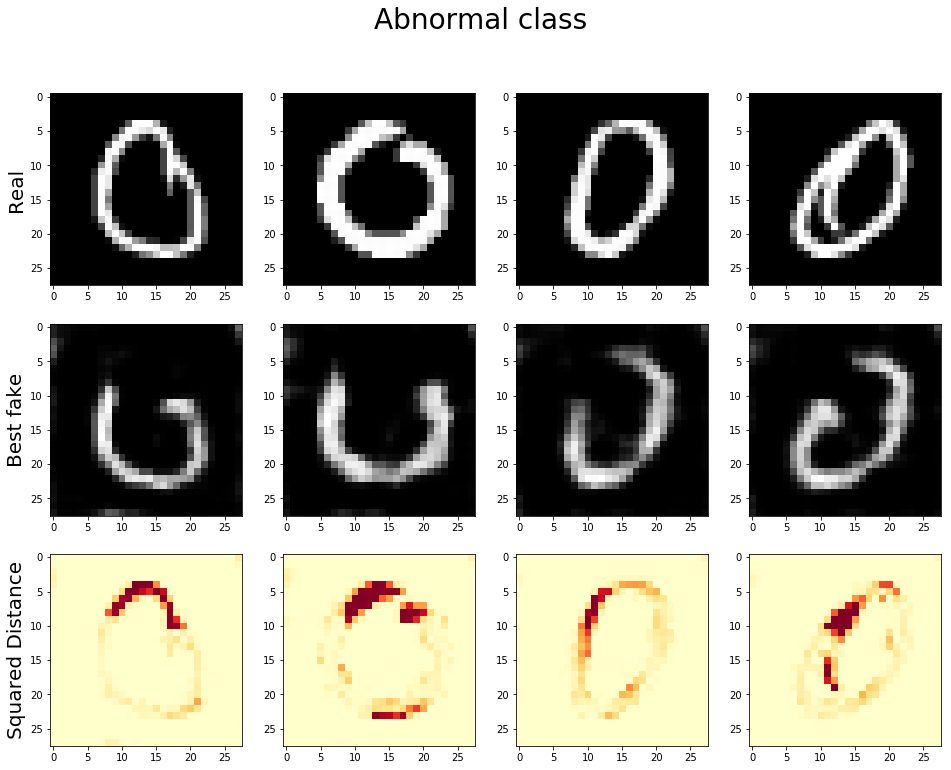

In [10]:
n_img = 4

normal_test_images = \
    test_data_normal.data[np.random.choice(test_data_normal.data.shape[0], n_img, replace=False), :, :]
abnormal_test_images = \
    test_data_abnormal.data[np.random.choice(test_data_abnormal.data.shape[0], n_img, replace=False), :, :]

normal_best_fakes = [detective.diagnose(nor_img) for nor_img in normal_test_images]
abnormal_best_fakes = [detective.diagnose(abn_img) for abn_img in abnormal_test_images]

# Plot normal class
fig, ax = plt.subplots(3, n_img, figsize=(16, 12))
fig.suptitle('Normal class', fontsize=28)
ax[0, 0].set_ylabel('Real', fontsize=20)
ax[1, 0].set_ylabel('Best fake', fontsize=20)
ax[2, 0].set_ylabel('Squared Distance', fontsize=20)

for i in range(n_img):
    ax[0, i].imshow(normal_test_images[i], cmap='gray'); 
    ax[1, i].imshow(normal_best_fakes[i], cmap='gray')
    ax[2, i].imshow(np.square(normal_test_images[i] - normal_best_fakes[i]), cmap='YlOrRd', vmin=0, vmax=1)

# Plot abnormal class
fig, ax = plt.subplots(3, n_img, figsize=(16, 12))
fig.suptitle('Abnormal class', fontsize=28)
ax[0, 0].set_ylabel('Real', fontsize=20)
ax[1, 0].set_ylabel('Best fake', fontsize=20)
ax[2, 0].set_ylabel('Squared Distance', fontsize=20)

for i in range(n_img):
    ax[0, i].imshow(abnormal_test_images[i], cmap='gray'); 
    ax[1, i].imshow(abnormal_best_fakes[i], cmap='gray')
    ax[2, i].imshow(np.square(abnormal_test_images[i] - abnormal_best_fakes[i]), cmap='YlOrRd', vmin=0, vmax=1)